In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Saharsh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saharsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv(r"C:\Users\Saharsh\IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


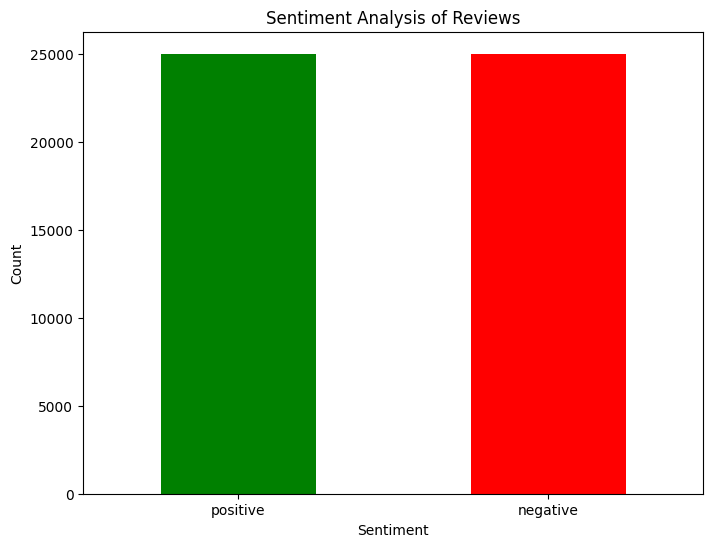

In [4]:
sentiment_counts = df['sentiment'].value_counts()

# Plotting the sentiment counts
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['encoded_sentiment'] = label_encoder.fit_transform(df['sentiment'])
print(df.head())

                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

   encoded_sentiment  
0                  1  
1                  1  
2                  1  
3                  0  
4                  1  


In [6]:
import re

def remove_special_characters(text):
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'\d', ' ', text) 
  
    return text

df['review'] = df['review'].apply(remove_special_characters)

In [7]:
df.head()

,review,sentiment,encoded_sentiment
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production br br The filmin...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there s a family where a little boy ...,negative,0
4,Petter Mattei s Love in the Time of Money is a...,positive,1


In [8]:
from nltk import word_tokenize
df['tokens'] = df['review'].apply(word_tokenize)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
import nltk

# Download VADER lexicon and punkt tokenizer if not already downloaded
nltk.download('vader_lexicon')
nltk.download('punkt')

# Assuming df is your loaded DataFrame
# df = pd.read_csv('your_dataset.csv')  # Your dataset loading step

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(review):
    score = sid.polarity_scores(review)['compound']
    if score >= 0.5:
        return 'Positive'
    elif score <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to the review column
df['sentiment'] = df['review'].apply(get_sentiment)

# Filter out neutral reviews

# Tokenize the reviews
df['tokens'] = df['review'].apply(word_tokenize)

# Separate positive and negative reviews
positive_reviews = df[df['sentiment'] == 'Positive']['tokens']
negative_reviews = df[df['sentiment'] == 'Negative']['tokens']

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Saharsh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saharsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
df['review'] = df['review'].str.lower()
sentiment_counts = df['encoded_sentiment'].value_counts()
print(sentiment_counts)

encoded_sentiment
1    25000
0    25000
Name: count, dtype: int64


In [11]:
X = df['review']
y = df['encoded_sentiment']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, train_size=0.9)

In [13]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TfidfVectorizer
vec = TfidfVectorizer(
    ngram_range=(1, 2),
    min_df=3,
    max_df=0.9,
    strip_accents='unicode',
    use_idf=True,
    smooth_idf=True,
    sublinear_tf=True,
    binary=True,
    stop_words='english'
)
# Fit and transform the training data
X_train_vec = vec.fit_transform(X_train)

# Transform the validation data
X_valid_vec = vec.transform(X_valid)

# Check the shapes of the transformed data
print(X_train_vec.shape)
print(X_valid_vec.shape)

(45000, 276267)
(5000, 276267)


In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
clf = model.fit(X_train_vec, y_train)

In [15]:
from sklearn.metrics import log_loss, accuracy_score
predictions = clf.predict(X_valid_vec)
loss = log_loss(y_valid, predictions)
print("Cross entropy loss:", loss)

score = accuracy_score(y_valid, predictions)
print("Accuracy:", score)

Cross entropy loss: 3.712496299079066
Accuracy: 0.897


In [16]:
def predict_sentiment(review):
    review = remove_special_characters(review)
    review = review.lower()
    review_vec = vec.transform([review])
    prediction = clf.predict(review_vec)
    sentiment = label_encoder.inverse_transform(prediction)
    return sentiment[0]

# Take custom input from user and predict sentiment
while True:
    user_input = input("Enter a movie review (or 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    sentiment = predict_sentiment(user_input)
    print(f"Predicted sentiment: {sentiment}")

Enter a movie review (or 'exit' to quit):  nice movie


Predicted sentiment: positive


Enter a movie review (or 'exit' to quit):  bad movie


Predicted sentiment: negative


Enter a movie review (or 'exit' to quit):  i dont know what to say


Predicted sentiment: positive


Enter a movie review (or 'exit' to quit):  it was a basic movie


Predicted sentiment: negative


Enter a movie review (or 'exit' to quit):  exitttt


Predicted sentiment: positive


Enter a movie review (or 'exit' to quit):  exit
